# Benchmarking the surface code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

import stim
from pymatching import Matching

from hyperedge_decomposition import decompose_dem, from_dem_to_stim, from_stim_to_dem

In [5]:
NUM_ROUNDS = np.arange(2, 50, 4)
DISTANCE = 3
after_clifford_depolarization = 0.01
NUM_SHOTS = 1_000_000

In [3]:
list_log_prob = []
list_log_prob_stim = []

for rounds in NUM_ROUNDS:
    print(f"round={rounds} \r", end="") 
    circuit = stim.Circuit.generated(code_task="surface_code:rotated_memory_z", distance=DISTANCE, rounds=rounds, 
                                     after_clifford_depolarization=after_clifford_depolarization)

    t0 = time.time()
    dem = from_stim_to_dem(circuit.detector_error_model().flattened())
    decom_dem = decompose_dem(dem)
    decom = from_dem_to_stim(decom_dem)
    t1 = time.time()
    print(f"round={rounds}   {(t1 - t0):0.3f}\r", end="") 

    decom_stim = circuit.detector_error_model(decompose_errors=True)

    sampler = circuit.compile_detector_sampler()
    defects, log_flips = sampler.sample(shots=NUM_SHOTS, separate_observables=True)

    MWPM = Matching(decom)
    MWPM_stim = Matching(decom_stim)

    t2 = time.time()
    predictions = MWPM.decode_batch(defects)
    predictions_stim = MWPM_stim.decode_batch(defects)
    print(f"round={rounds}   {(t1 - t0):0.3f}   {(time.time() - t2):0.3f}") 
    
    log_prob = np.average(predictions != log_flips)
    log_prob_stim = np.average(predictions_stim != log_flips)

    list_log_prob.append(log_prob)
    list_log_prob_stim.append(log_prob_stim)

round=3   0.042   0.728


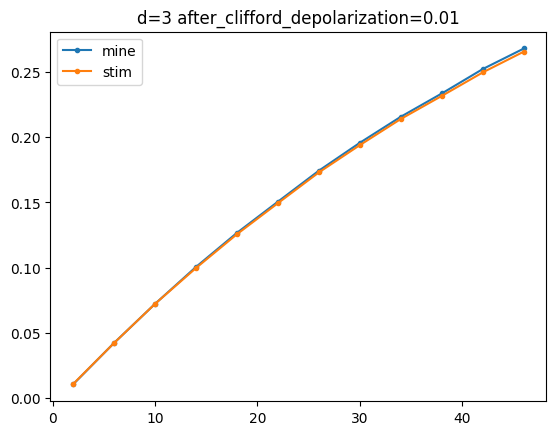

In [8]:
plt.plot(NUM_ROUNDS, list_log_prob, ".-", label="mine")
plt.plot(NUM_ROUNDS, list_log_prob_stim, ".-", label="stim")
plt.legend()
plt.title(f"d={DISTANCE} after_clifford_depolarization={after_clifford_depolarization}")
plt.show()

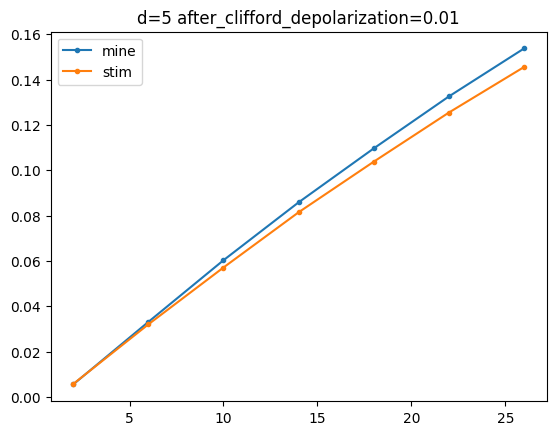

In [15]:
plt.plot(NUM_ROUNDS, list_log_prob, ".-", label="mine")
plt.plot(NUM_ROUNDS, list_log_prob_stim, ".-", label="stim")
plt.legend()
plt.title(f"d={DISTANCE} after_clifford_depolarization={after_clifford_depolarization}")
plt.show()

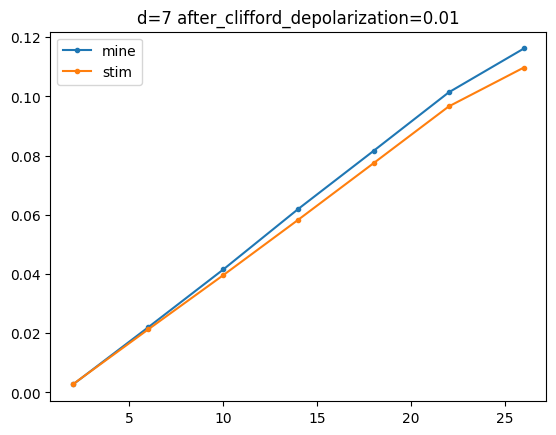

In [28]:
plt.plot(NUM_ROUNDS, list_log_prob, ".-", label="mine")
plt.plot(NUM_ROUNDS, list_log_prob_stim, ".-", label="stim")
plt.legend()
plt.title(f"d={DISTANCE} after_clifford_depolarization={after_clifford_depolarization}")
plt.show()